# Prediksi Perhitungan Lebar Gigi Seri Tengah Atas Dengan Regression
Author : Dwi Mustikasari (1402018219)


# Import Package 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_log_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import pearsonr
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
!pip3 install catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

     |████████████████████████████████| 76.6 MB 47 kB/s 


# Import Dataset From Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis (EDA)





In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset2/Facial measurements New.csv')
df.head(10)

,photo number,ICW,IAW,MCW,LCW,IPW,CW,SEX
0,2,5.34,3.740,3.32,8.88,6.29,0.88,F
1,4,4.75,3.380,2.92,7.99,5.77,0.79,F
2,5,4.52,3.225,2.85,7.60,5.47,0.75,F
3,9,4.76,3.540,3.11,8.30,5.95,0.82,F
4,10,5.15,3.380,3.25,8.51,6.20,0.85,F
5,11,5.25,3.740,3.18,8.76,6.34,0.87,F
6,12,5.12,3.590,3.18,8.67,6.17,0.85,F
7,13,5.55,3.780,3.46,9.27,6.64,0.92,F
8,14,4.97,3.460,3.10,8.42,6.01,0.83,F
9,15,5.08,3.620,3.16,8.54,6.18,0.85,F


## Data Visualizations

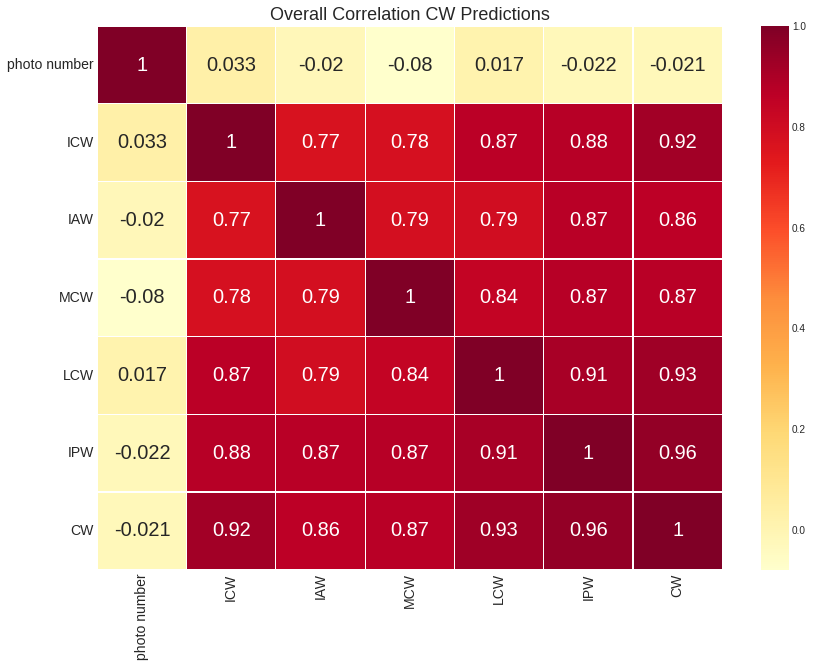

In [ ]:
plt.style.use('seaborn-white')
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='YlOrRd',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.title("Overall Correlation CW Predictions", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

     jumlah sampel  persentase
SEX                           
M               86        50.9
F               83        49.1


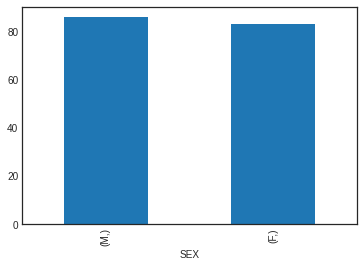

In [ ]:
feature = ['SEX']
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar');

## Data Preparations


In [ ]:
df = df.drop(columns='SEX')
df = df.drop(columns='photo number')

In [ ]:
df.head()

,ICW,IAW,MCW,LCW,IPW,CW
0,5.34,3.740,3.32,8.88,6.29,0.88
1,4.75,3.380,2.92,7.99,5.77,0.79
2,4.52,3.225,2.85,7.60,5.47,0.75
3,4.76,3.540,3.11,8.30,5.95,0.82
4,5.15,3.380,3.25,8.51,6.20,0.85


In [ ]:
X = df[df.columns[:-1]]
y = np.array(df['CW'])

In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

In [ ]:
X

array([[0.64864865, 0.56716418, 0.64583333, 0.62195122, 0.56818182],
       [0.25      , 0.29850746, 0.22916667, 0.2601626 , 0.27272727],
       [0.09459459, 0.18283582, 0.15625   , 0.10162602, 0.10227273],
       [0.25675676, 0.41791045, 0.42708333, 0.38617886, 0.375     ],
       [0.52027027, 0.29850746, 0.57291667, 0.47154472, 0.51704545],
       [0.58783784, 0.56716418, 0.5       , 0.57317073, 0.59659091],
       [0.5       , 0.45522388, 0.5       , 0.53658537, 0.5       ],
       [0.79054054, 0.59701493, 0.79166667, 0.7804878 , 0.76704545],
       [0.39864865, 0.35820896, 0.41666667, 0.43495935, 0.40909091],
       [0.47297297, 0.47761194, 0.47916667, 0.48373984, 0.50568182],
       [0.62837838, 0.6641791 , 0.59375   , 0.61382114, 0.625     ],
       [0.46621622, 0.5       , 0.44791667, 0.46341463, 0.47727273],
       [0.14189189, 0.23880597, 0.15625   , 0.11788618, 0.11931818],
       [0.26351351, 0.3880597 , 0.36458333, 0.24390244, 0.19886364],
       [0.4527027 , 0.46268657, 0.

## Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60)

In [ ]:
len(X_train)

135

In [ ]:
len(X_test)

34

In [ ]:
len(y_test)

34

# Modeling

## CatBoost Regressor

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.001, class_weight='balanced')

In [ ]:
model.fit(X_train,y_train)

ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)
mse_cb1 = mean_squared_error(y_pred,y_test)
mae_cb1 = mean_absolute_error(y_pred,y_test)
rmse_cb1 = np.sqrt(mse_cb1)
r_cb1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_cb1))
print("Root Means Squared Error (RMSE) = " + str(rmse_cb1))
print("Pearsonr Correlations Coefficient = " + str(r_cb1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("CatBoost Regression")

AttributeError: ignored

In [ ]:
y_pred = np.array(y_pred)

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by CatBoost Regressor:")
print("\t\tCW Predicted:  ", np.round(model.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Linear Regression

In [ ]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

In [ ]:
y_pred = model1.predict(X_test)
mse_lr1 = mean_squared_error(y_pred,y_test)
mae_lr1 = mean_absolute_error(y_pred,y_test)
rmse_lr1 = np.sqrt(mse_lr1)
r_lr1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_lr1))
print("Root Means Squared Error (RMSE) = " + str(rmse_lr1))
print("Pearsonr Correlations Coefficient = " + str(r_lr1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Linear Regression")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Linear Regression:")
print("\t\tCW Predicted:  ", np.round(model.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## XGB Regression

In [ ]:
model2 = XGBRegressor()
model2.fit(X_train, y_train)

In [ ]:
y_pred = model2.predict(X_test)
mae_xgb1 = mean_absolute_error(y_pred,y_test)
mse_xgb1 = mean_squared_error(y_pred,y_test)
rmse_xgb1 = np.sqrt(mse_xgb1)
r_xgb1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_xgb1))
print("Root Means Squared Error (RMSE) = " + str(rmse_xgb1))
print("Pearsonr Correlations Coefficient = " + str(r_xgb1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("XGBoost Regression")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by XGB Regressor:")
print("\t\tCW Predicted:  ", np.round(model2.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Decision Tree *Regression*

In [ ]:
model3 = DecisionTreeRegressor(random_state=60)
model3.fit(X_train, y_train)

In [ ]:
y_pred = model3.predict(X_test)
mse_dt1 = mean_squared_error(y_pred,y_test)
mae_dt1 = mean_absolute_error(y_pred,y_test)
rmse_dt1 = np.sqrt(mse_dt1)
r_dt1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_dt1))
print("Root Means Squared Error (RMSE) = " + str(rmse_dt1))
print("Pearsonr Correlations Coefficient = " + str(r_dt1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Decison Tree Regression")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Decision Tree Regressor:")
print("\t\tCW Predicted:  ", np.round(model3.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Random Forest Regression

In [ ]:
from sklearn import model_selection
model4 = RandomForestRegressor(random_state=60)
    
model4.fit(X_train, y_train)

In [ ]:
y_pred = model4.predict(X_test)
mse_rf1 = mean_squared_error(y_pred,y_test)
mae_rf1 = mean_absolute_error(y_pred,y_test)
rmse_rf1 = np.sqrt(mse_rf1)
r_rf1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rf1))
print("Root Means Squared Error (RMSE) = " + str(rmse_rf1))
print("Pearsonr Correlations Coefficient = " + str(r_rf1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Random Forest Regression")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Random Forest Regressor:")
print("\t\tCW Predicted:  ", np.round(model4.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## KNeighbors Regressor

In [ ]:
model6 =KNeighborsRegressor()
model6.fit(X_train, y_train)

In [ ]:
y_pred = model6.predict(X_test)
mse_kn1 = mean_squared_error(y_pred,y_test)
mae_kn1 = mean_absolute_error(y_pred,y_test)
rmse_kn1 = np.sqrt(mse_kn1)
r_kn1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_kn1))
print("Root Means Squared Error (RMSE) = " + str(rmse_kn1))
print("Pearsonr Correlations Coefficient = " + str(r_kn1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("KNeighbors Regression")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model6.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Ridge Regression

In [ ]:
model7 = Ridge()
model7.fit(X_train, y_train)

In [ ]:
y_pred = model7.predict(X_test)
mse_rg1 = mean_squared_error(y_pred,y_test)
mae_rg1 = mean_absolute_error(y_pred,y_test)
rmse_rg1 = np.sqrt(mse_rg1)
r_rg1, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rg1))
print("Root Means Squared Error (RMSE) = " + str(rmse_rg1))
print("Pearsonr Correlations Coefficient = " + str(r_rg1))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Ridge Regression")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model7.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

# EVALUASI

In [ ]:
tbl1 = pd.DataFrame({'Algoritma': ['CatBoost', 'Linear Regression', 'XGB Regression', 'Decision Tree','Random Forest Regression','KNeighbors Regressor', 'Ridge Regression'],
                   'RMSE': [rmse_cb1, rmse_lr1, rmse_xgb1, rmse_dt1, rmse_rf1 , rmse_kn1, rmse_rg1],
                   'MAE': [mae_cb1, mae_lr1, mae_xgb1, mae_dt1, mae_rf1 , mae_kn1, mae_rg1],
                   'r corr': [r_cb1, r_lr1, r_xgb1, r_dt1, r_rf1 , r_kn1, r_rg1]})
blankIndex2=[''] * len(tbl1)
tbl1.index=blankIndex2
tbl1

# Modeling hyperparameter tuning 

## CatBoost Regressor

In [ ]:
model8 = CatBoostRegressor()

In [ ]:
parameters = {'depth'         : [1,2,3,4,5,6,7, 8,10],
              'learning_rate' : [0.1, 0.2, 0.3,1,2,3,4],
              'iterations'    : [ 50, 100, 200, 300]}

model8 = GridSearchCV(estimator=model8, param_grid = parameters, cv = 2, n_jobs=-1)

model8.fit(X_train,y_train)
model8.best_params_

In [ ]:
y_pred = model8.predict(X_test)
mse_cb2 = mean_squared_error(y_pred,y_test)
mae_cb2 = mean_absolute_error(y_pred,y_test)
rmse_cb2 = np.sqrt(mse_cb2)
r_cb2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_cb2))
print("Root Means Squared Error (RMSE) = " + str(rmse_cb2))
print("Pearsonr Correlations Coefficient = " + str(r_cb2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Catboost Regression With GridSearchCV")

In [ ]:
y_pred = np.array(y_pred)

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by CatBoost Regressor:")
print("\t\tCW Predicted:  ", np.round(model8.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Linear Regression

In [ ]:
model9 = LinearRegression()

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False], 'positive':[True,False], 'n_jobs':[200, 300, 1000]}
model9 = GridSearchCV(model9,parameters, cv=2)
model9.fit(X_train, y_train)
model9.best_params_

In [ ]:
y_pred = model9.predict(X_test)
mse_lr2 = mean_squared_error(y_pred,y_test)
mae_lr2 = mean_absolute_error(y_pred,y_test)
rmse_lr2 = np.sqrt(mse_lr2)
r_lr2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_lr2))
print("Root Means Squared Error (RMSE) = " + str(rmse_lr2))
print("Pearsonr Correlations Coefficient = " + str(r_lr2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Linear Regression With GridSearchCV")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Linear Regression:")
print("\t\tCW Predicted:  ", np.round(model9.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## XGB Regression

In [ ]:
model10 = XGBRegressor()


In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06, 0.07, 0.08, 0.09], #so called `eta` value
             }
model10 = GridSearchCV(model10,parameters, cv=None)
model10.fit(X_train, y_train)
model10.best_params_

In [ ]:
y_pred = model10.predict(X_test)
mse_xgb2 = mean_squared_error(y_pred,y_test)
mae_xgb2 = mean_absolute_error(y_pred,y_test)
rmse_xgb2 = np.sqrt(mse_xgb2)
r_xgb2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_xgb2))
print("Root Means Squared Error (RMSE) = " + str(rmse_xgb2))
print("Pearsonr Correlations Coefficient = " + str(r_xgb2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("XGboost Regression With GridSearchCV")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by XGB Regressor:")
print("\t\tCW Predicted:  ", np.round(model10.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Decision Tree *Regression*

In [ ]:
model11 = DecisionTreeRegressor()


In [ ]:
param_grid = {"splitter":["best","random"],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10], 
           "random_state" : [ 8,16, 32, 42],
           "max_depth":[1000, 100, 20, 19, 18,17,15],'max_leaf_nodes':[1000, 100, 20, 19, 18],'min_samples_leaf':[1, 2, 3, 4,5], "max_features":["auto", "sqrt", "log2"]}
           
model11 = GridSearchCV(model11, param_grid, cv=3, scoring='f1_macro')

model11.fit(X_train,y_train)
model11.best_params_

In [ ]:
y_pred = model11.predict(X_test)
mse_dt2 = mean_squared_error(y_pred,y_test)
mae_dt2 = mean_absolute_error(y_pred,y_test)
rmse_dt2 = np.sqrt(mse_dt2)
print("Means Absolute Error (MAE) = " + str(mae_dt2))
print("Root Means Squared Error (RMSE) = " + str(rmse_dt2))
r_dt2, _ =  pearsonr(y_test, y_pred)
print("Pearsonr Correlations Coefficient = " + str(r_dt2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Decision Tree Regression With GridSearchCV")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Decision Tree Regressor:")
print("\t\tCW Predicted:  ", np.round(model11.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Random Forest Regression

In [ ]:
model12 = RandomForestRegressor()


In [ ]:
param_grid = { 'max_depth' : [ 6, 7, 8, 10, 100, 1000], 'n_estimators':[10,100],
               'oob_score':[True,False], 'random_state':[8, 16, 42]}
model12 = GridSearchCV(model12, param_grid, n_jobs=100, cv=5, scoring='f1_macro')

model12.fit(X_train,y_train)
model12.best_params_

In [ ]:
y_pred = model12.predict(X_test)
mse_rf2 = mean_squared_error(y_pred,y_test)
mae_rf2 = mean_absolute_error(y_pred,y_test)
rmse_rf2 = np.sqrt(mse_rf2)
r_rf2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rf2))
print("Root Means Squared Error (RMSE) = " + str(rmse_rf2))
print("Pearsonr Correlations Coefficient = " + str(r_rf2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Random Forest Regression With GridSearchCV")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by Random Forest Regressor:")
print("\t\tCW Predicted:  ", np.round(model12.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## KNeighbors Regressor

In [ ]:
model13 = KNeighborsRegressor()


In [ ]:
param_grid = {'n_neighbors': [ 3, 2, 1],'p':[2, 3, 4, 5], "weights":['uniform', 'distance']}
model13 = GridSearchCV(model13, param_grid,cv=3, scoring='f1_macro')

model13.fit(X_train,y_train)
model13.best_params_

In [ ]:
y_pred = model13.predict(X_test)
mse_kn2 = mean_squared_error(y_pred,y_test)
mae_kn2 = mean_absolute_error(y_pred,y_test)
rmse_kn2 = np.sqrt(mse_kn2)
r_kn2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_kn2))
print("Root Means Squared Error (RMSE) = " + str(rmse_kn2))
print("Pearsonr Correlations Coefficient = " + str(r_kn2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("KNeighbors Regression With GridSearchCV")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model13.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

## Ridge Regression

In [ ]:
model14 = Ridge()

In [ ]:
param_grid = {'alpha':[0.01, 0.1, 0.2, 0.3],"fit_intercept":[True,False], 'random_state':[42, 16], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}  
model14 = GridSearchCV(model14, param_grid,n_jobs=-1, scoring='f1_macro')

model14.fit(X_train,y_train)
model14.best_params_

In [ ]:
y_pred = model14.predict(X_test)
mse_rg2 = mean_squared_error(y_pred,y_test)
mae_rg2 = mean_absolute_error(y_pred,y_test)
rmse_rg2 = np.sqrt(mse_rg2)
r_rg2, _ =  pearsonr(y_pred,y_test)
print("Means Absolute Error (MAE) = " + str(mae_rg2))
print("Root Means Squared Error (RMSE) = " + str(rmse_rg2))
print("Pearsonr Correlations Coefficient = " + str(r_rg2))
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.xlabel("actual CW")
plt.ylabel("predicted CW")
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title("Ridge Regression With GridSearchCV")

In [ ]:
random_index = np.random.randint(0,X_test.shape[1])
print("Prediction made by KNeighbors Regressor:")
print("\t\tCW Predicted:  ", np.round(model14.predict(X_test[random_index:random_index+1])[0],5))
print("\t\tActual Widht:  ", np.round(y_test[random_index],5))

#EVALUASI


In [ ]:
tbl2 = pd.DataFrame({'Algoritma': ['CatBoost', 'Linear Regression', 'XGB Regression', 'Decision Tree','Random Forest Regression','KNeighbors Regressor', 'Ridge Regression'],
                    'RMSE BEFORE': [rmse_cb1, rmse_lr1, rmse_xgb1, rmse_dt1,rmse_rf1 , rmse_kn1, rmse_rg1],
                   'RMSE': [rmse_cb2, rmse_lr2, rmse_xgb2, rmse_dt2,rmse_rf2 , rmse_kn2, rmse_rg2],
                    'MAE BEFORE': [mae_cb1, mae_lr1, mae_xgb1, mae_dt1, mae_rf1 , mae_kn1, mae_rg1],
                   'MAE': [mae_cb2, mae_lr2, mae_xgb2, mae_dt2, mae_rf2 , mae_kn2, mae_rg2],
                   'r corr BEFORE': [r_cb1, r_lr1, r_xgb1, r_dt1, r_rf1 , r_kn1, r_rg1],
                   'r corr': [r_cb2, r_lr2, r_xgb2, r_dt2, r_rf2 , r_kn2, r_rg2]})
blankIndex2=[''] * len(tbl2)
tbl2.index=blankIndex2
tbl2


In [ ]:
# creating the dataset

fig = plt.figure(figsize = (8, 8))
 
# creating the bar plot
plt.bar(tbl2['Algoritma'], tbl2['r corr'], color ='grey',
        width = 0.4)
 
plt.xlabel("Algoritma")
plt.ylabel("Pearson Correlations Coefficient")
plt.title("Perbandingan Pearson Correlations Coefficient")
plt.show()

https://colab.research.google.com/drive/1eWMtxh-DS3QVUoN5U6oiuhReWRPM0WRx?usp=sharing >>> system with Gender
